In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
import time
import os
import math
import matplotlib
from tqdm import trange
import matplotlib.ticker as ticker

# TEN-ARMED Bandit Testbed

##### mimicing the Fig 2.2

In [7]:
#seed_val = 1
#np.random.seed(seed_val)

In [8]:
class NArmedBandit:
    
    #10-armed bandit testbed with sample averages 
    def __init__(self,k=10,step_size = 0.1,eps = 0,init_estimates = 0.0,mu = 0, std_dev = 1):
        self.k = k
        self.step_size = step_size
        self.eps = eps
        self.init_estimates = init_estimates
        self.mu = mu
        self.std_dev = std_dev
        self.actions = np.zeros(k)
        self.true_reward = 0.0
        self.re_init()
        
        
    def re_init(self):
        
        #true values of rewards for each action
        self.actions = np.random.normal(self.mu,self.std_dev,self.k) 

        # estimation for each action
        self.Q_t = np.zeros(self.k) + self.init_estimates

        # num of chosen times for each action
        self.N_t = np.zeros(self.k)

        #best action chosen
        self.optim_action = np.argmax(self.actions)

        self.time_step = 0
        
        
    def act(self):
        val = np.random.rand()
        if val < self.eps:
            A_t = np.random.choice(np.arange(self.k))
            #print('action 1:',A_t)
        else:
            Q_max = np.max(self.Q_t)
            A_t = np.random.choice(np.where(self.Q_t == Q_max)[0])
            #print('action 2:',A_t)
        return A_t
    
    
    
    def step(self,action):
        
        # generating the reward under N(real reward, 1)
        reward = np.random.randn() + self.actions[action]
        self.time_step += 1
        self.N_t[action] += 1
        

        # update estimation using sample averages
        self.Q_t[action] += (reward - self.Q_t[action]) / self.N_t[action]
        
        return reward
    
    
    def play(self,tasks,num_time_steps):
        rewards = np.zeros((tasks, num_time_steps))
        optim_action_counts = np.zeros(rewards.shape)
        for task in trange(tasks):
            self.re_init()
            for t in range(num_time_steps):
                action = self.act()
                reward = self.step(action)
                rewards[task, t] = reward
                if action == self.optim_action:
                    optim_action_counts[task, t] = 1
        avg_optim_action_counts = optim_action_counts.mean(axis=0)
        avg_rewards = rewards.mean(axis=0)
        return avg_optim_action_counts*100, avg_rewards

In [9]:
def playNArmedVBandit(epsilons,tasks, num_time_steps):
    eps_results = {}
    for eps in epsilons: 
        print('running for eps : ', eps)
        eps_results[eps] = {}
        bandit = NArmedBandit(k=10,step_size = 0.1,eps = eps)
        avg_optim_action_counts,avg_rewards = bandit.play(tasks=tasks,num_time_steps = num_time_steps)
        eps_results[eps]['Optim_Action_Counts'] = avg_optim_action_counts
        eps_results[eps]['Average_Rewards'] = avg_rewards
        
    for eps in epsilons:
        plt.plot(eps_results[eps]['Average_Rewards'],label = r'$\epsilon$' + ' = %.02f' % (eps))
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.title('Average Rewards for 10-Arm Bandits')
    plt.legend(frameon=True)
    plt.show()
    
    fig, ax = plt.subplots()
    for eps in epsilons:
        ax.plot(eps_results[eps]['Optim_Action_Counts'],label = r'$\epsilon$' + ' = %.02f' % (eps))
    ax.set_xlabel('Steps')
    ax.set_ylabel('% Optimal Action')
    ax.set_title('% Optimal Action for 10-Arm Bandits')
    ax.legend(frameon=True)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    plt.show()
    

  0%|          | 5/2000 [00:00<00:42, 46.99it/s]

starting 10 Armed Bandits play
running for eps :  0


  0%|          | 8/2000 [00:00<00:27, 72.19it/s]

running for eps :  0.1


  0%|          | 6/2000 [00:00<00:33, 58.99it/s]

running for eps :  0.01


100%|██████████| 2000/2000 [00:29<00:00, 68.51it/s]


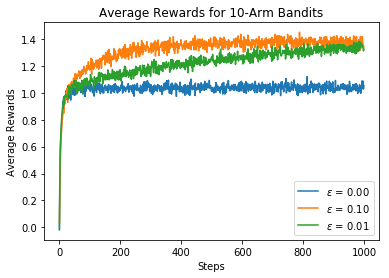

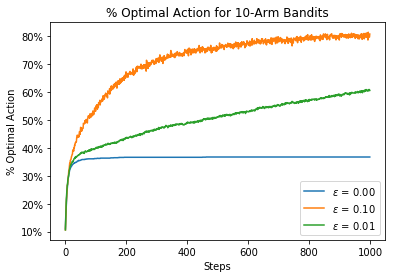

In [10]:
if __name__=='__main__':
    print('starting 10 Armed Bandits play')
    epsilons = [0,0.1,0.01]
    #epsilons = [0]
    tasks = 2000
    num_time_steps = 1000
    playNArmedVBandit(epsilons,tasks, num_time_steps)